## This notebook is about predicting students' performance in their final exam based on first period exam G1 and second period exam G2

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/Regression/student-por.csv', usecols = [30,31,32])

In [5]:
df.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [27]:
def getHypothesis(X, theta):
    return np.dot(X, theta)

In [7]:
def getCost(X, Y, theta):
    H = getHypothesis(X, theta)
    cost = sum(pow(H-Y,2))/(2*len(Y))
    return cost

In [12]:
X = df[['G1','G2']]
Y = df[['G3']]

In [13]:
X.head()

,G1,G2
0,0,11
1,9,11
2,12,13
3,14,14
4,11,13


### Inserting first column in the training set as ones for ease in the upcoming operations like getting hypothesis and working with gradient descent

In [14]:
X.insert(0,'ones',1)

In [15]:
X.head()

,ones,G1,G2
0,1,0,11
1,1,9,11
2,1,12,13
3,1,14,14
4,1,11,13


### converting training data from data frame into numpy arrays

In [16]:
train_matrix = X.as_matrix()

In [17]:
type(train_matrix)

numpy.ndarray

In [18]:
train_matrix

array([[ 1,  0, 11],
       [ 1,  9, 11],
       [ 1, 12, 13],
       ..., 
       [ 1, 11, 12],
       [ 1, 10, 10],
       [ 1, 10, 11]], dtype=int64)

In [72]:
ground_truth_matrix = Y['G3'].as_matrix()
type(ground_truth_matrix)

numpy.ndarray

#### Testing the hypothesis function

In [28]:
getHypothesis(train_matrix, [1,1,1])

array([12, 21, 26, 29, 25, 25, 26, 24, 32, 25, 29, 23, 26, 25, 29, 35, 27,
       28, 17, 25, 26, 24, 26, 21, 22, 22, 24, 23, 25, 24, 22, 31, 28, 26,
       25, 23, 29, 27, 24, 28, 23, 22, 30, 20, 22, 22, 26, 35, 24, 26, 28,
       31, 20, 26, 26, 26, 30, 31, 28, 32, 34, 21, 27, 28, 26, 32, 24, 20,
       22, 31, 25, 21, 25, 27, 23, 23, 24, 27, 19, 24, 23, 20, 24, 26, 26,
       24, 25, 31, 23, 19, 21, 28, 26, 28, 24, 27, 21, 26, 26, 26, 19, 33,
       26, 22, 33, 21, 21, 28, 23, 31, 28, 23, 19, 36, 20, 31, 32, 29, 24,
       28, 29, 28, 27, 26, 24, 19, 22, 20, 29, 26, 22, 20, 22, 24, 26, 29,
       19, 25, 24, 28, 20, 28, 23, 24, 24, 19, 21, 28, 18, 21, 18, 29, 24,
       27, 22, 17, 25, 22, 23, 26, 23, 19, 24, 21, 20, 27, 21, 27, 16, 18,
       22, 23, 21, 18, 17, 14, 18, 18, 17, 16, 20, 35, 25, 33, 19, 34, 21,
       28, 29, 22, 26, 21, 20, 23, 22, 24, 36, 28, 30, 25, 20, 28, 26, 19,
       25, 24, 22, 22, 26, 30, 27, 22, 30, 22, 29, 24, 30, 27, 27, 18, 23,
       30, 26, 24, 25, 26

In [29]:
getCost(train_matrix, ground_truth_matrix,[1,1,1])

array([  5,  46, 104, 151,  90,  90, 104,  78, 207,  90, 151,  66, 104,
        90, 151, 271, 119, 134,  18,  90, 104,  78, 104,  46,  56,  56,
        78,  66,  90,  78,  56, 187, 134, 104,  90,  66, 151, 119,  78,
       134,  66,  56, 168,  37,  56,  56, 104, 271,  78, 104, 134, 187,
        37, 104, 104, 104, 168, 187, 134, 207, 249,  46, 119, 134, 104,
       207,  78,  37,  56, 187,  90,  46,  90, 119,  66,  66,  78, 119,
        30,  78,  66,  37,  78, 104, 104,  78,  90, 187,  66,  30,  46,
       134, 104, 134,  78, 119,  46, 104, 104, 104,  30, 227, 104,  56,
       227,  46,  46, 134,  66, 187, 134,  66,  30, 295,  37, 187, 207,
       151,  78, 134, 151, 134, 119, 104,  78,  30,  56,  37, 151, 104,
        56,  37,  56,  78, 104, 151,  30,  90,  78, 134,  37, 134,  66,
        78,  78,  30,  46, 134,  23,  46,  23, 151,  78, 119,  56,  18,
        90,  56,  66, 104,  66,  30,  78,  46,  37, 119,  46, 119,  13,
        23,  56,  66,  46,  23,  18,   7,  23,  23,  18,  13,  3

#### It's the time for going for gradient descent

In [88]:
def getGradient(X, Y, theta, alpha, num_iter):
    cost_history = []
    for i in xrange(num_iter):
        H = getHypothesis(X, theta)
        for j in xrange(len(theta)):
            theta[j] = theta[j] - ( alpha * (sum((H-Y) * X[:,j])/len(Y)))
        cost_history.append(getCost(X,Y,theta))
    return theta, cost_history

In [126]:
(T, history) = getGradient( train_matrix, ground_truth_matrix, [0,0,0], .007, 8000)

In [127]:
print history[-1], T

0.793245862385 [-0.16077958323458222, 0.14830923887557659, 0.89685905446787295]


In [120]:
len(train_matrix[:,0])

649

#### Here i ignored plotting the first 500 iteration cause if i plotted it it will make the earlier iterations appears as decreasing fast then the rest will seems like there are no change in it 

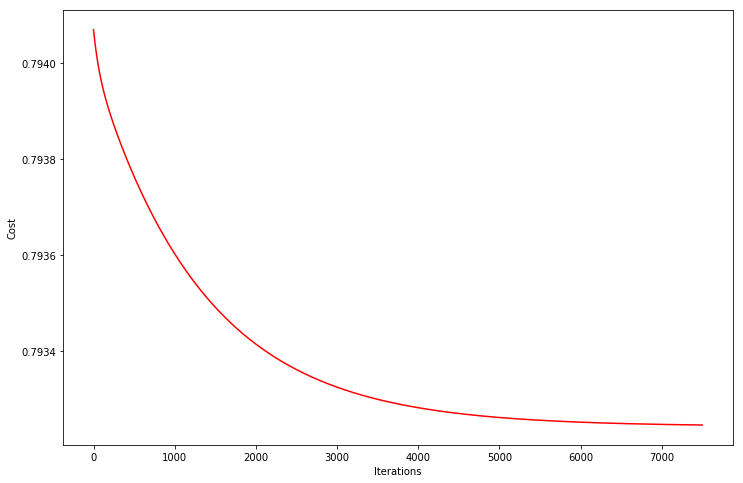

In [134]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(xrange(8000-500),history[500:], 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')
fig

### get the theta of built in linear regression from sklearn

In [107]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [109]:
model.fit(df[['G1','G2']], df['G3'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
print model.intercept_, model.coef_

-0.171283087987 [ 0.14889649  0.89714029]


In [115]:
print getCost(train_matrix, ground_truth_matrix, [-0.171283087987, 0.14889649,0.89714029])

0.793242934474


#### So it's the time for testing the algorithm on test set
##### the test set contains some duplicate data from training set, so what's i am going to do now is concatinating the two data sets then remove the duplicate data to ensure that the test set has no points from the other set 

In [139]:
test_set = pd.read_csv('Datasets/Regression/student-mat.csv')
original_train_set = pd.read_csv('Datasets/Regression/student-por.csv')

In [149]:
frames = 


In [157]:
test_set = pd.concat([original_train_set,test_set])

In [158]:
test_set.drop_duplicates(keep= False)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [177]:
test_set = test_set[['G1','G2','G3']]
test_set.insert(0,'one',1)
test_mat = test_set.as_matrix()
type(test_mat)

numpy.ndarray

#### the cost of my model when using test set

In [185]:
getCost(test_mat[:,0:3],test_mat[:,3] ,T)

1.1063992293336931